<a href="https://colab.research.google.com/github/shcho11/00.ML_Practices_2022_KB/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
from sklearn.cluster import DBSCAN

## DBSCAN(density based spatial clustering of application with noise)
> 앞서 소개한 계층적 군집화나 K-means 군집화 알고리즘은 샘플간 혹은 군집간 거리를 기준으로 학습한다.  
반면 `DBSCAN`은 **샘플의 밀도가 높은 부분을 하나의 군집**으로 인식한다.  
특정 샘플 기준으로 설정한 반경($\epsilon$ : 입실론) 내 n개 이상의 샘플이 있으면 이를 하나의 군집으로 인식한다.  
밀도 기반 군집화에서는 군집에 속하지 않는 샘플이 발생하기도 하며, 이는 이상치라고 판단한다.  

<img src="https://drive.google.com/uc?id=1htsHkWutMidznsMM_lNPGEH7SOYJvJsU" height="400px" width="400px">  

이 다이어그램에서 minPts = 4. 점 A와 다른 빨간색 점들은 core point.  
θ 반지름에서 이러한 점들을 둘러싼 영역에는 최소 4개의 점(점 자체 포함)이 포함되고, 서로 연결할 수 있기 때문에 단일 클러스터를 형성합니다.  
점 B와 C는 core point가 아니지만 A에서(다른 core point를 통해) 도달할 수 있으므로 군집에 포함. (border point : 보통 군집화 경계)  
점 N은 핵심점이 아니거나 직접 도달할 수 없는 noise point.


### DBSCAN 특징
<img src="https://drive.google.com/uc?id=14rFtn4MhcKGRCUeRs1M0zbMx2zEC-gid">

위와 같은 작동 방식으로 인하여 `DBSCAN`에서는 클러스터 숫자를 특정 할 필요가 없으며 복잡한 분포의 데이터에도 적용이 가능하다.  

<img src="https://drive.google.com/uc?id=17NKVQag8H2ZG-SZg24UE2XUkEBcarzDU" width='600px'>
<img src="https://drive.google.com/uc?id=12mR7xQlWctZVACUsLcqTr1IKvwUv6-fv" width='600px'>

In [4]:
dbscan = DBSCAN()

'''
eps=0.5 : 입실론(중심반경)
min_samples=5, 중심기준 추적 샘플 수
metric='euclidean', 거리 측정 방법
eps와 min_samples가 가장 중요하지만 최적 파라메터 측정이 어렵다. 디폴트 값이 가장 잘 맞는 편.
'''

"\neps=0.5 : 입실론(중심반경)\nmin_samples=5, 중심기준 추적 샘플 수\nmetric='euclidean', 거리 측정 방법\neps와 min_samples가 가장 중요하지만 최적 파라메터 측정이 어렵다. 디폴트 값이 가장 잘 맞는 편.\n"

In [5]:
# 데이터셋 제작 및 전처리 함수 import
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [6]:
# 특이패턴 데이터 생성
x_moon, y_moon = make_moons(n_samples=200, noise=0.05)

In [8]:
# 전처리
scaler = StandardScaler() #평균을 0, 표준편차를 1
#설명변수 혹은 종속변수의 스케일값이 클 때 사용
x_moon = scaler.fit_transform(x_moon)

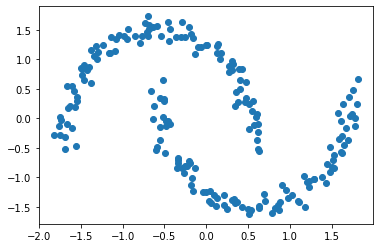

In [11]:
from matplotlib import pyplot as plt
plt.scatter(x_moon[:, 0], x_moon[:, 1])

In [12]:
y_moon

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1])

In [13]:
predicted = dbscan.fit_predict(x_moon)

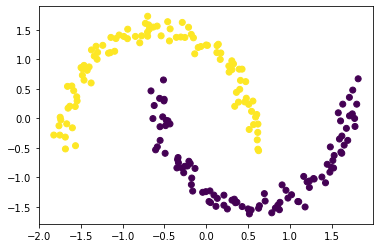

In [14]:
plt.scatter(x_moon[:, 0], x_moon[:, 1], c=predicted)